In [2]:
import pandas as pd
import csv
import numpy as np

In [ ]:
# cat metadata_enrolled_*.tsv > meta_world_202212_202310.tsv
# rm metadata_enrolled_*.tsv
# scp meta_world_202212_202310.tsv soniali@192.168.14.235:/home/soniali/Desktop/01_china_recom/1_epi/world_china_compare_GISAID/

In [3]:
output_path = dirpath = "/home/soniali/Desktop/02_china_recom_github/1_epi/world_china_compare_GISAID/"
df = pd.read_csv(dirpath+"meta_world_202212_202310.tsv")
print(df.shape)

(739678, 4)


In [4]:
df

,strain,date,country,lineage
0,EPI_ISL_16651307,2022-12-27,USA,BN.1.5.2
1,EPI_ISL_16651308,2022-12-27,USA,BQ.1
2,EPI_ISL_16651312,2022-12-27,USA,BA.5.2.6
3,EPI_ISL_16651313,2022-12-27,USA,BQ.1.14
4,EPI_ISL_16651314,2022-12-27,USA,BQ.1.2.1
...,...,...,...,...
739673,EPI_ISL_16651279,2022-12-27,USA,BQ.1.1
739674,EPI_ISL_16651283,2022-12-27,USA,BQ.1.15
739675,EPI_ISL_16651285,2022-12-27,USA,BQ.1.1.52
739676,EPI_ISL_16651304,2022-12-27,USA,DT.3


In [5]:
del_index = []
for i in df.index:
    if len(df.loc[i,"date"]) != 10:
        del_index.append(i)

len(del_index)

8885

In [6]:
for i in df.index:
    if {i} - set(del_index) == set():
        df = df.drop(index = i,axis = 1)

In [7]:
#合并谱系,另存为csv,建立合并与合并前对应的字典。
output_path = "/home/soniali/Desktop/02_china_recom_github/1_epi/"
lineage_file = output_path+'lineage_hebing_32.csv'
dict_lineage_hebing = {}
with open(lineage_file) as csvfile:
    csv_reader = csv.reader(csvfile)  
    for row in csv_reader:
        if row[0] != '谱系名':
            lineage_after = row[0]
            linaege_before = row[1].replace(' ','').split(',')
            dict_lineage_hebing[lineage_after] = linaege_before

In [9]:
#在上面新建的一列中填入合并后的谱系
df["merged_lineage"] = np.nan
for k,v in dict_lineage_hebing.items():
    for i in v:
        df.loc[(df.lineage == i) ,'merged_lineage'] = k      
        
for i in df.index:
    if df.loc[i,"merged_lineage"] not in set(dict_lineage_hebing.keys()):
        df.loc[i,"merged_lineage"] = "Others"
        

In [10]:
new_df = df.drop('lineage', axis=1)
# new_df.to_csv(dirpath+'Qualified_world_china_meta_merged_202212_202310.txt',index = None)

# 运行plot_Ridgeline.r

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import colorbar

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


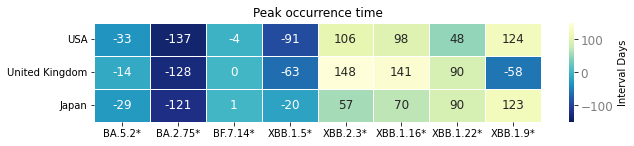

In [12]:
df = pd.read_csv(dirpath+"compare_china_world_GISAID_plot.csv", index_col=0)

#绘制热度图：
font = {'family': 'Times New Roman', 'size': 12}
tick_=np.arange(-150,150,30).astype(float)
dict_={'orientation':'vertical',"label":"color  \
scale","drawedges":True,"ticklocation":"right","extend":"min", \
"filled":True,"alpha":0.8,"cmap":"cmap","ticks":tick_,"spaci,linewidths=0.5ng":'proportional'}
fig = plt.figure(figsize = (10, 4))
ax=fig.add_subplot(2,1,1)
cmap = sns.heatmap(df,linewidths=0.8,annot=True,fmt="d",cmap='YlGnBu_r',annot_kws=font, vmin=-150,vmax=150, center=0)

plt.title("Peak occurrence time",size=12)

# 旋转轴刻度上文字方向
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

#调整色带的标签：
cbar = cmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=12,labelcolor="grey")
cbar.ax.set_ylabel(ylabel="Interval Days",size=10,color="black",loc="center")
# fig.savefig(dirpath+"compare_china_world_GISAID_intervaldays.pdf")

plt.show()

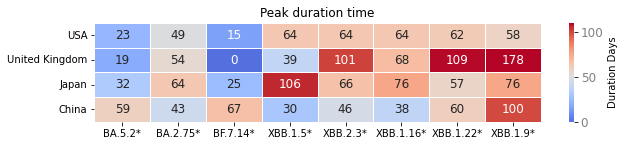

In [15]:
df_peak_period = pd.read_csv(dirpath+"compare_china_world_GISAID_period_plot.csv",index_col = 0)
df_heatmap_plot = pd.DataFrame(df_peak_period, dtype="int")

#绘制热度图
font = {'family': 'Times New Roman', 'size': 12}
fig = plt.figure(figsize = (10, 4))
ax=fig.add_subplot(2,1,1)
cmap = sns.heatmap(df_heatmap_plot,linewidths=0.8,fmt="d",annot=True,cmap='coolwarm',annot_kws=font, vmin=0,vmax=110, center=50)
plt.title("Peak duration time",size=12)

# 旋转轴刻度上文字方向的
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

#调整色带的标签：
cbar = cmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=12,labelcolor="grey")
cbar.ax.set_ylabel(ylabel="Duration Days",size=10,color="black",loc="center")
# plt.savefig(dirpath+"compare_china_world_GISAID_peakperiod.pdf")

plt.show()

In [14]:
df_peak_period.loc["USA"].tolist()

[23, 49, 15, 64, 64, 64, 62, 58]

In [18]:
# print("China")
# print(59+43+67+30)
# print(46+38+60+100)

# print("USA")
# print(23+49+15+64)
# print(64+64+62+58)
# print("UK")
# print(19+54+0+39)
# print(101+68+109+178)
# print("Japan")
# print(32+64+25+106)
# print(66+76+57+76)

In [19]:
df_peak_period

,BA.5.2*,BA.2.75*,BF.7.14*,XBB.1.5*,XBB.2.3*,XBB.1.16*,XBB.1.22*,XBB.1.9*
USA,23,49,15,64,64,64,62,58
United Kingdom,19,54,0,39,101,68,109,178
Japan,32,64,25,106,66,76,57,76
China,59,43,67,30,46,38,60,100


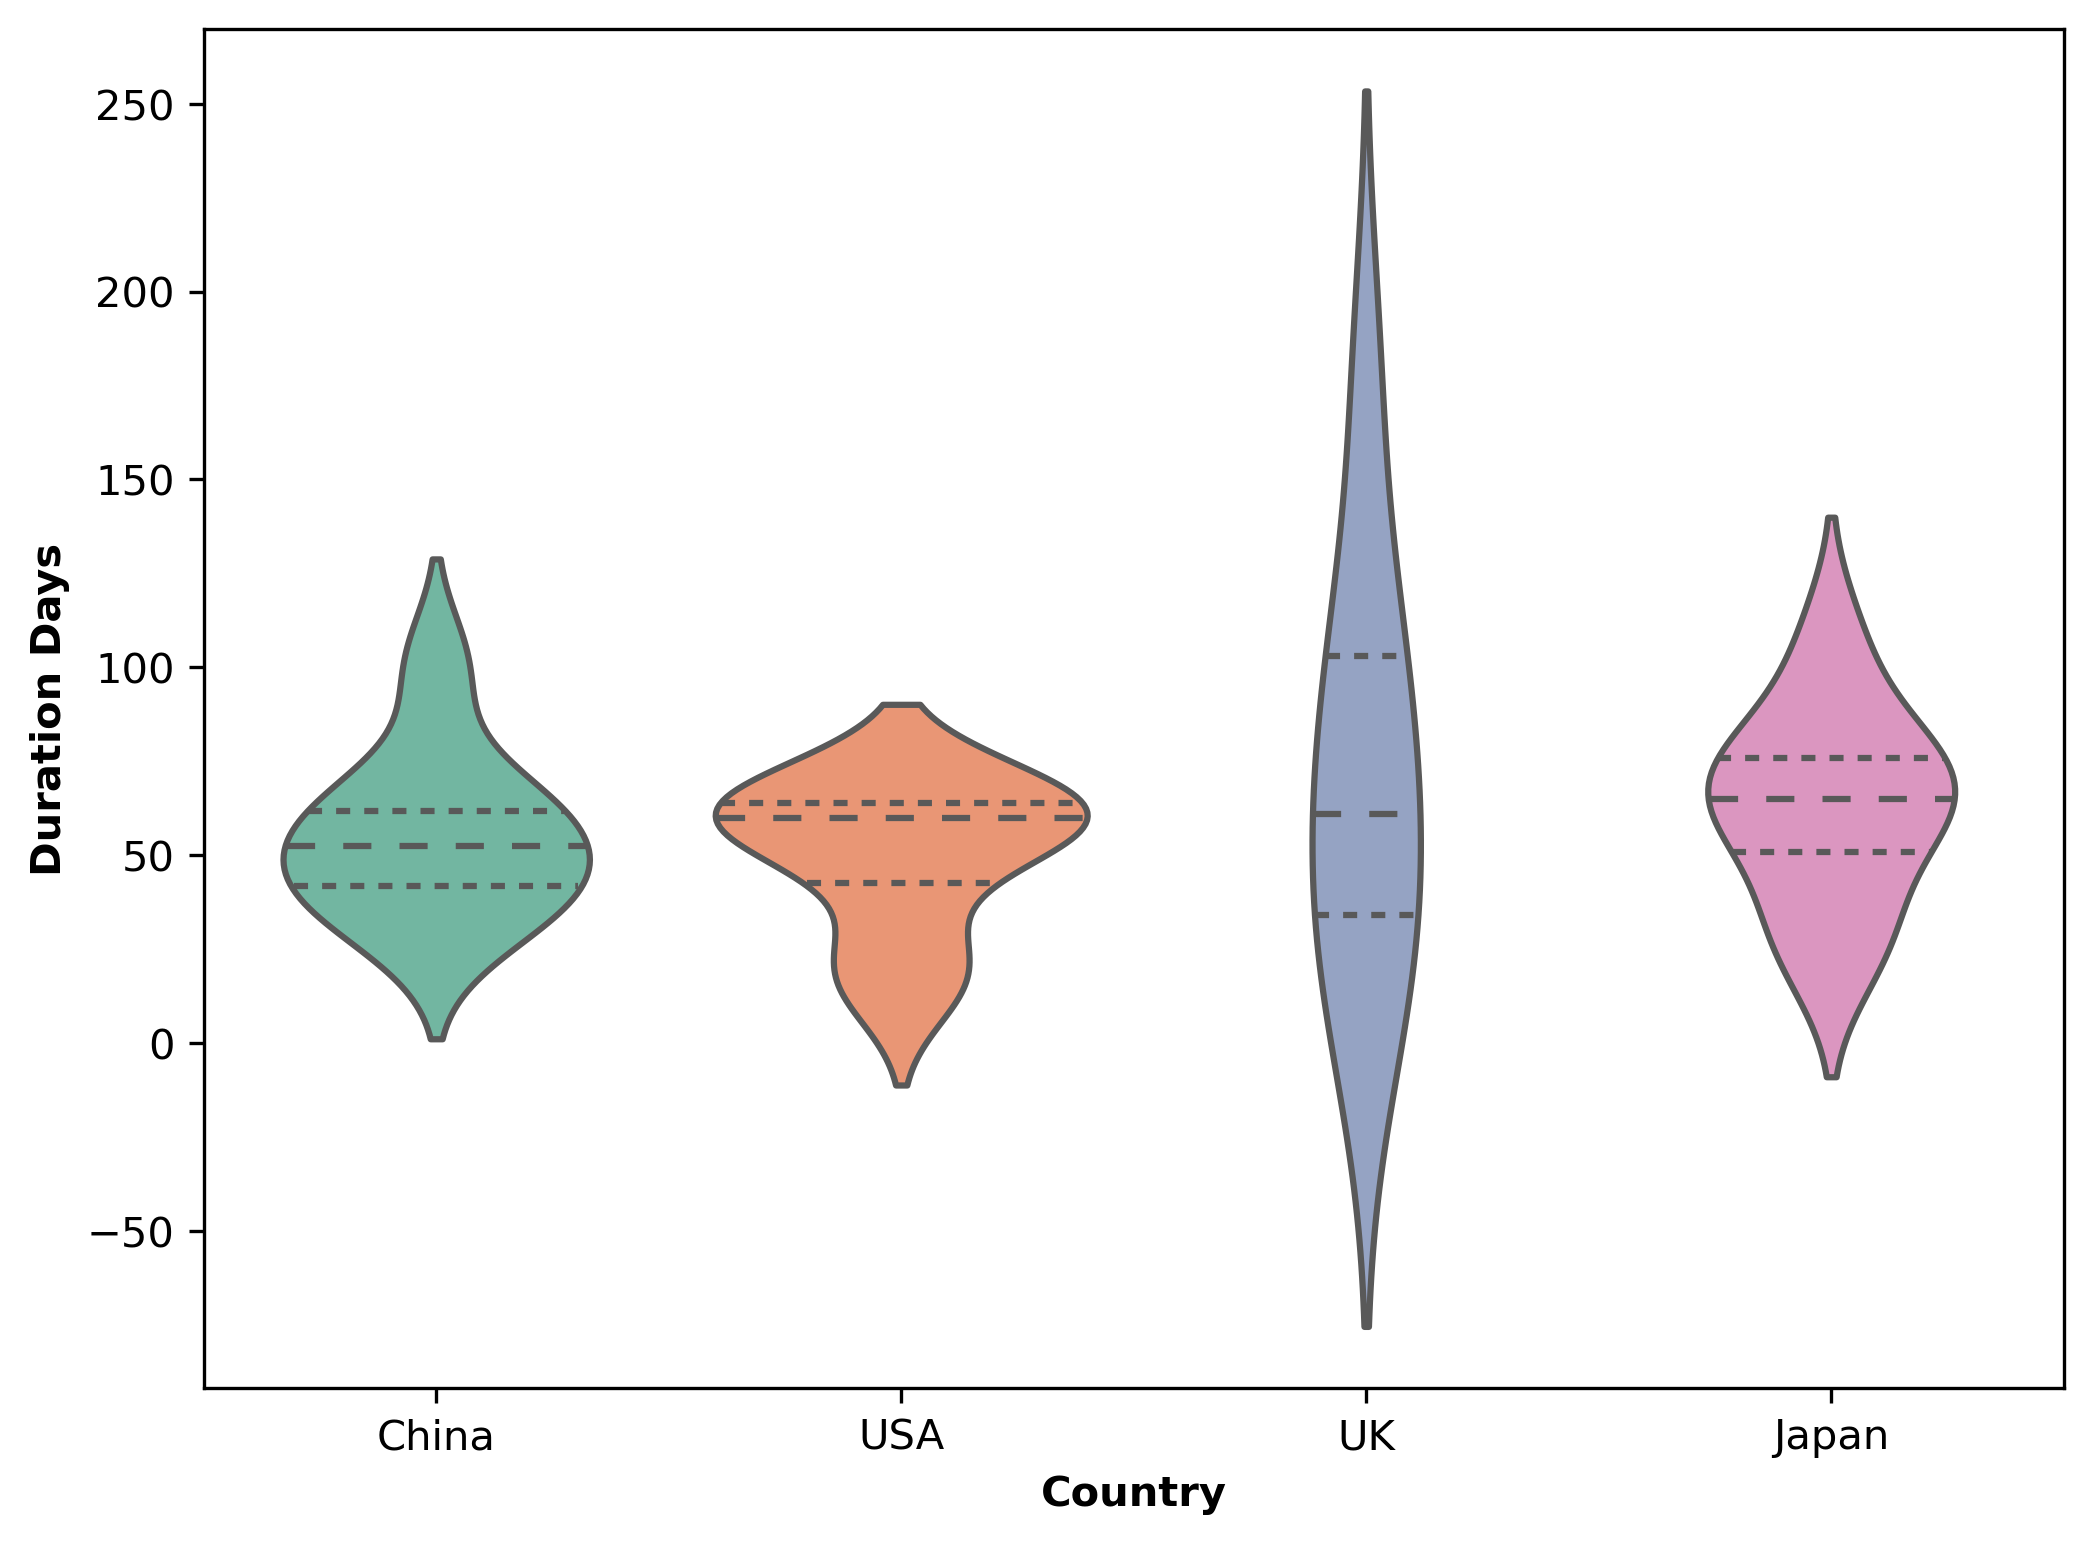

In [20]:
from scipy.stats import ttest_rel
import seaborn as sns
import matplotlib.pyplot as plt

# 创建配对样本数据
China = df_peak_period.loc["China"].tolist()
USA = df_peak_period.loc["USA"].tolist()
UK = df_peak_period.loc["United Kingdom"].tolist()
Japan = df_peak_period.loc["Japan"].tolist()
# 创建四组配对样本数据
group_names = ['China', 'USA', 'UK', 'Japan']
data = pd.DataFrame({'China': China, 'USA': USA, 'UK': UK, 'Japan': Japan})

# 进行配对样本T检验并记录P值
pairwise_p_values = {}
for i in range(len(group_names)):
    for j in range(i+1, len(group_names)):
        group1 = data[group_names[i]]
        group2 = data[group_names[j]]
        t_statistic, p_value = ttest_rel(group1, group2)
        pairwise_p_values[f'{group_names[i]}_{group_names[j]}'] = p_value


plt.figure(figsize = [8,6],dpi = 300)
sns.violinplot(x='variable', y='value', data=pd.melt(data), inner='quartile', palette='Set2')
plt.xlabel('Country', weight='bold')
plt.ylabel('Duration Days', weight='bold')

# plt.savefig(output_path+"Durationday.pdf")
plt.show()


In [17]:
# import pandas as pd
# from scipy.stats import chi2_contingency

# # 创建一个DataFrame
# data = {'China': [199, 244],
#         'Category2': [112, 456]}
# df = pd.DataFrame(data)

# # 进行卡方检验
# chi2, p, dof, expected = chi2_contingency(df)

# # 输出结果
# print(f"卡方统计量：{chi2}")
# print(f"P值：{p}")
# print(f"自由度：{dof}")
# print("期望频数：")
# print(expected)


卡方统计量：73.04440207332325
P值：1.2676563609000753e-17
自由度：1
期望频数：
[[136.27398615 174.72601385]
 [306.72601385 393.27398615]]
